In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

### Data Cleaning and Analysis, Feature Engineering

In [2]:
df = pd.read_csv('Global_Space_Exploration_Dataset.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head(20)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277
5,USA,2011,Down-sized holistic methodology,Unmanned,North Kevin,Research,22.76,85,Nuclear Propulsion,Low,France,166
6,Germany,2011,Adaptive coherent definition,Manned,Wilsonburgh,Spy,9.33,81,Solar Propulsion,High,"Japan, Russia, India",203
7,India,2012,Innovative 6thgeneration algorithm,Unmanned,South William,Weather,6.62,69,Solar Propulsion,Low,"India, UK, China",25
8,Israel,2024,Business-focused exuding contingency,Manned,Edwardstad,Navigation,13.25,60,Solar Propulsion,Low,"France, China",341
9,Israel,2011,Cross-group incremental function,Unmanned,Port Carla,Communication,23.76,66,Reusable Rocket,High,Japan,107


In [4]:
df.shape

(3000, 12)

In [5]:
df.isna().sum()

Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Collaborating Countries'] = df['Collaborating Countries'].str.split(', ')

In [8]:
df = df.explode('Collaborating Countries')

In [9]:
df = df.rename(columns={'Country': 'Main Country', 'Collaborating Countries': 'Collaborating Country'})

In [10]:
df.head(10)

,Main Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,China,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,Israel,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,USA,238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,Israel,277


In [11]:
df['Mission Name'].drop_duplicates()
print("There are 3000 rows and 3000 individual mission names wih drop duplicates.\n"
        "Each mission has a unique name so therefore, 'Mission Name' won't be useful in\n"
        "our machine learning project and can be dropped\n"
     )

There are 3000 rows and 3000 individual mission names wih drop duplicates.
Each mission has a unique name so therefore, 'Mission Name' won't be useful in
our machine learning project and can be dropped



In [12]:
df = df.drop('Mission Name', axis=1)

In [13]:
df.head()

,Main Country,Year,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [14]:
df['Launch Site'] = df['Launch Site'].str.strip()
df['Launch Site'].drop_duplicates()

0               Sheilatown
1             New Ericfurt
2         Port Kaitlynstad
3                Mariastad
4       North Jasonborough
               ...        
2994      East Elaineburgh
2995           East Shawna
2996        Douglasborough
2997             Bellhaven
2998            Deniseview
Name: Launch Site, Length: 2702, dtype: object

In [15]:
print(
    "There are 3,000 rows and 2,999 unique mission names after dropping duplicates.\n"
    "All missions except one have a unique launch site, so 'Launch Site' is not useful\n"
    "for our machine learning project and can be dropped."
)

There are 3,000 rows and 2,999 unique mission names after dropping duplicates.
All missions except one have a unique launch site, so 'Launch Site' is not useful
for our machine learning project and can be dropped.


In [16]:
df = df.drop('Launch Site', axis=1)

In [17]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [18]:
df['Duration (in Years)'] = (df['Duration (in Days)'] / 365.25)

In [19]:
df['Budget per Year (in Billion $)'] = (df['Budget (in Billion $)'] / df['Duration (in Years)']).round(2)

In [20]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $)
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94


### Exploratory Data Analysis

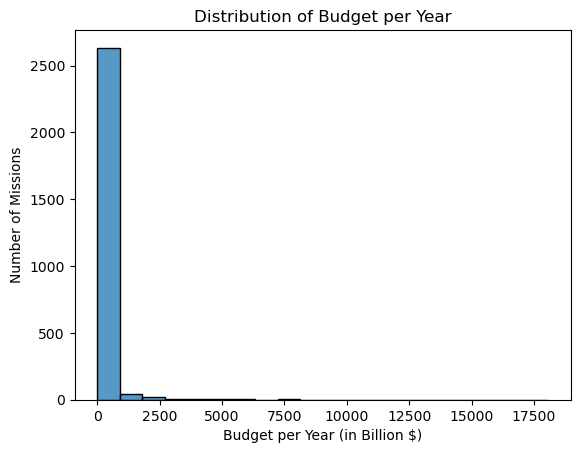

In [21]:
sns.histplot(df['Budget per Year (in Billion $)'].drop_duplicates(), bins=20)
plt.xlabel('Budget per Year (in Billion $)')
plt.ylabel('Number of Missions')
plt.title('Distribution of Budget per Year')
plt.show()

In [22]:
df['Budget per Year (in Billion $)'].max()

18072.57

In [23]:
df['Budget per Year (in Billion $)'].min()

0.62

In [24]:
df['Budget Category'] = pd.cut(df['Budget per Year (in Billion $)'], bins=[0, 10, 100, float('inf')], labels=['Low', 'Mid', 'High'])

In [25]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Budget Category
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94,Mid


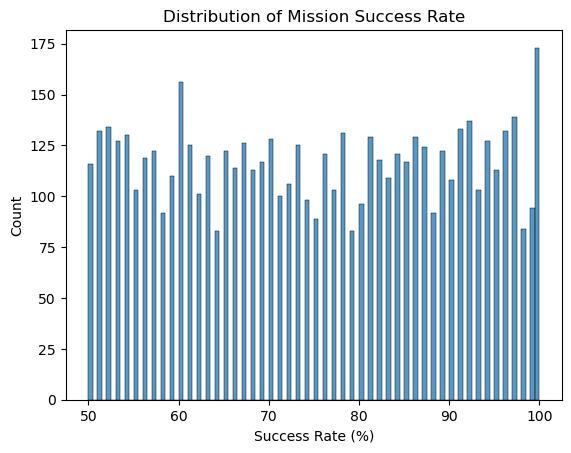

In [26]:
sns.histplot(df['Success Rate (%)'], bins=100)
plt.title('Distribution of Mission Success Rate')
plt.show()

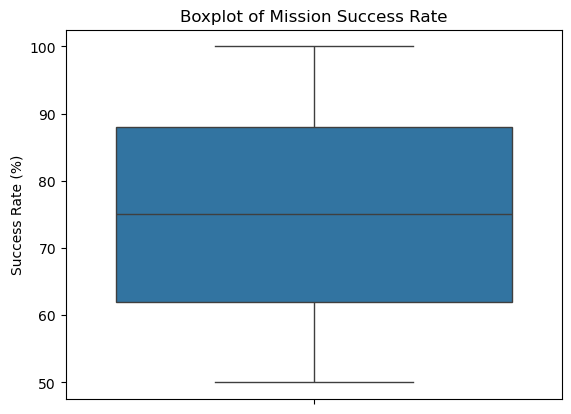

In [27]:
sns.boxplot(df['Success Rate (%)'])
plt.title('Boxplot of Mission Success Rate')
plt.show()

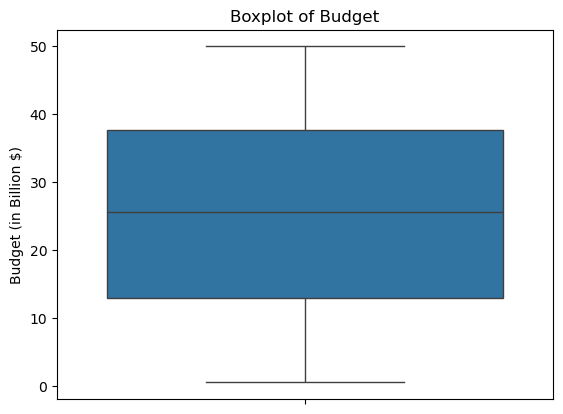

In [28]:
sns.boxplot(df['Budget (in Billion $)'])
plt.title('Boxplot of Budget')
plt.show()

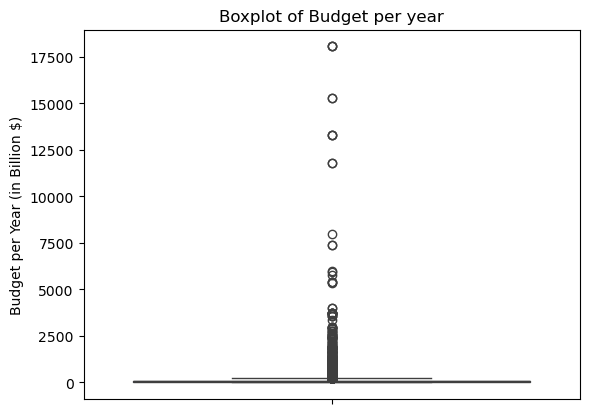

In [29]:
sns.boxplot(df['Budget per Year (in Billion $)'])
plt.title('Boxplot of Budget per year')
plt.show()

In [30]:
avg_success_year = df.groupby('Year')['Success Rate (%)'].mean().reset_index()

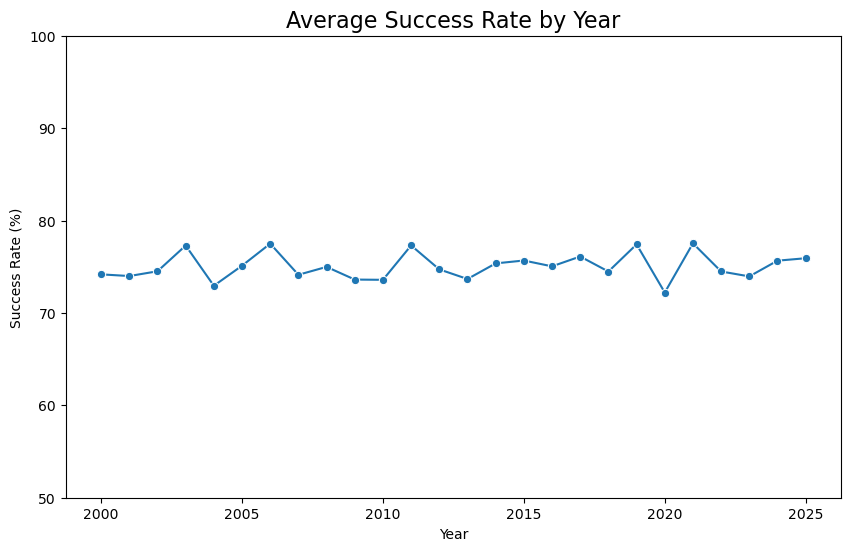

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_year , x='Year', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Year', fontsize=16)
plt.ylim(50, 100)
plt.show()

In [32]:
avg_success_country = df.groupby('Main Country')['Success Rate (%)'].mean().reset_index()

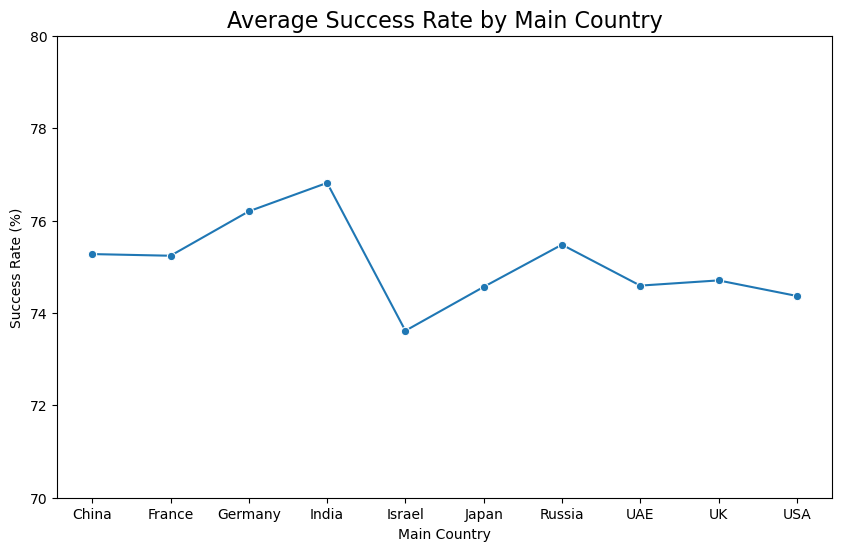

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_country , x='Main Country', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Main Country', fontsize=16)
plt.ylim(70, 80)
plt.show()

In [34]:
avg_success_col_country = df.groupby('Collaborating Country')['Success Rate (%)'].mean().reset_index()

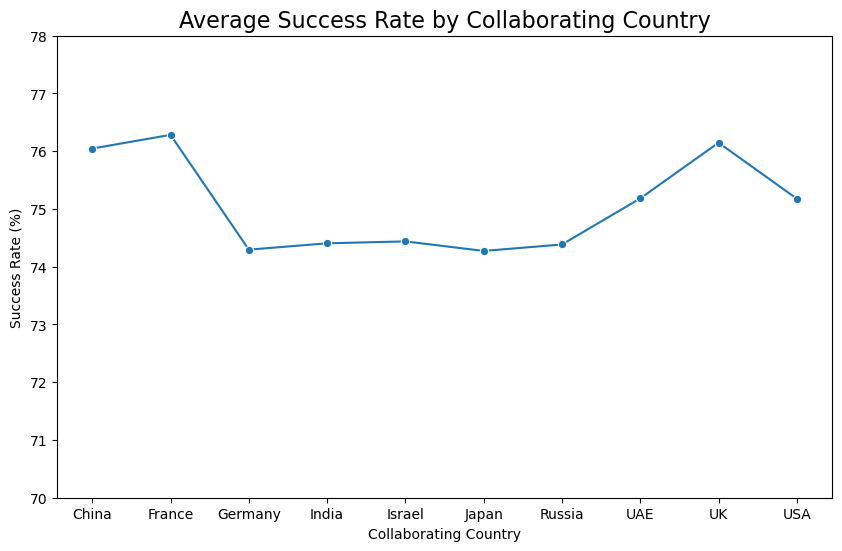

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_success_col_country , x='Collaborating Country', y='Success Rate (%)', marker='o')
plt.title('Average Success Rate by Collaborating Country', fontsize=16)
plt.ylim(70, 78)
plt.show()

In [36]:
avg_success_type = df.groupby('Mission Type')['Success Rate (%)'].mean().reset_index()

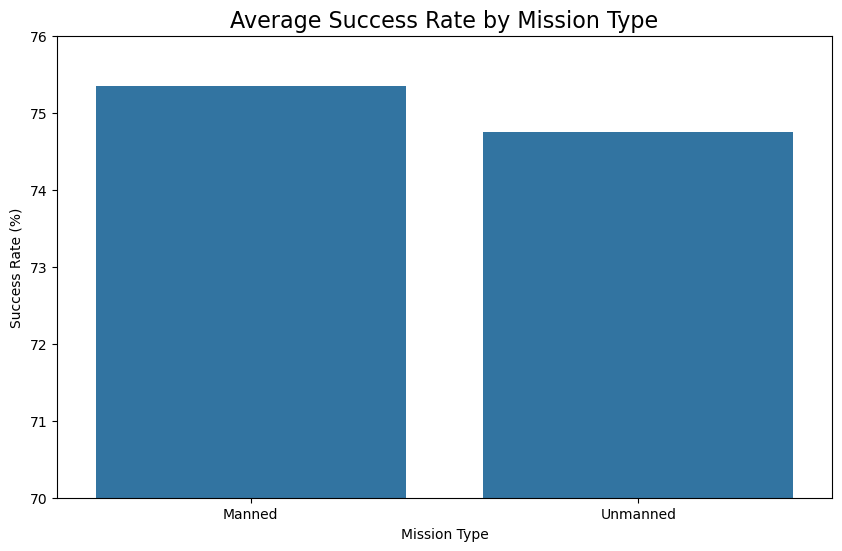

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_success_type , x='Mission Type', y='Success Rate (%)')
plt.title('Average Success Rate by Mission Type', fontsize=16)
plt.ylim(70, 76)
plt.show()

In [38]:
avg_success_satellite = df.groupby('Satellite Type')['Success Rate (%)'].mean().reset_index()

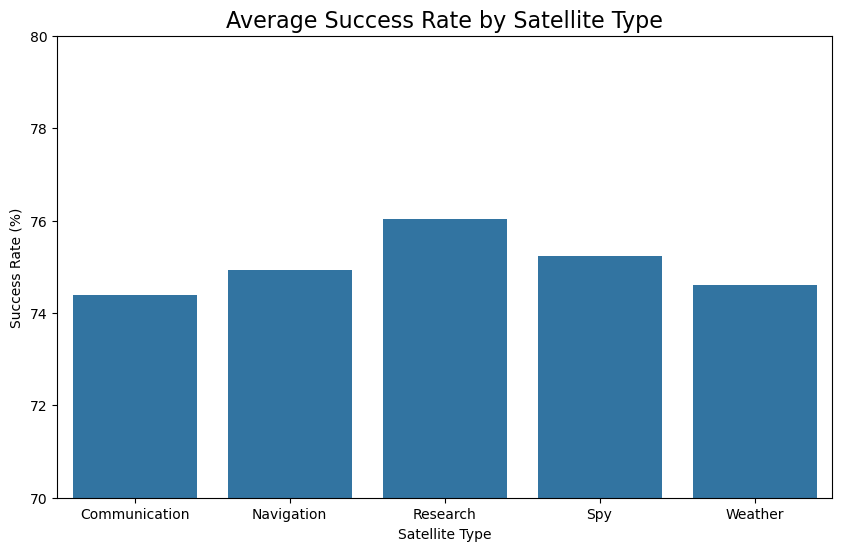

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_success_satellite , x='Satellite Type', y='Success Rate (%)')
plt.title('Average Success Rate by Satellite Type', fontsize=16)
plt.ylim(70, 80)
plt.show()

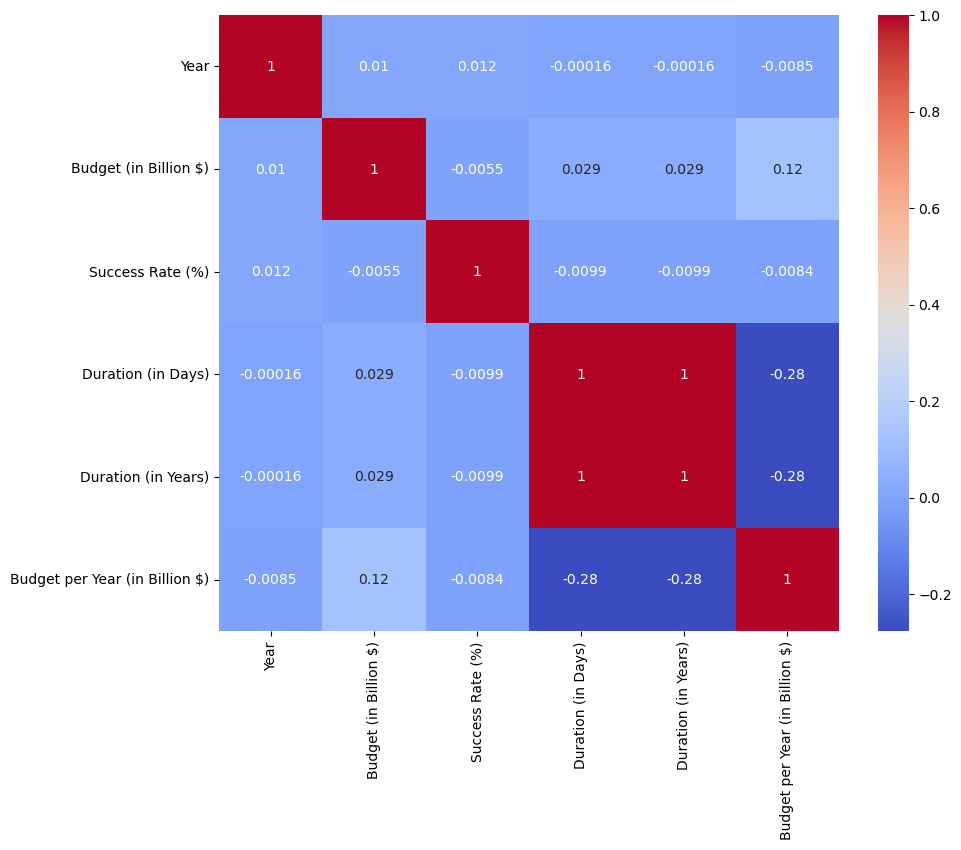

In [40]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Duration (in Years),Budget per Year (in Billion $),Budget Category
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,0.306639,52.83,Mid
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,0.306639,52.83,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.646133,44.94,Mid
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.646133,44.94,Mid


### Preprocessing

In [42]:
print("im going to drop the new columns i made because those are only to make the eda look better and it just adds more filler to the machine")

im going to drop the new columns i made because those are only to make the eda look better and it just adds more filler to the machine


In [43]:
df = df.drop('Budget per Year (in Billion $)', axis=1)

In [44]:
df = df.drop('Duration (in Years)', axis=1)

In [45]:
df = df.drop('Budget Category', axis=1)

In [46]:
nominal_cols = df[['Main Country','Mission Type','Satellite Type','Technology Used','Collaborating Country']]
ordinal_cols = df[['Environmental Impact']]

In [47]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [48]:
one_encoder = OneHotEncoder(sparse_output=False)
nominal = one_encoder.fit_transform(nominal_cols)

In [49]:
ohe_f_names = one_encoder.get_feature_names_out(nominal_cols.columns)

In [50]:
ohe_df = pd.DataFrame(nominal,columns=ohe_f_names,index=df.index)

In [51]:
ohe_df.head()

,Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,Main Country_Israel,Main Country_Japan,Main Country_Russia,Main Country_UAE,Main Country_UK,Main Country_USA,Mission Type_Manned,Mission Type_Unmanned,Satellite Type_Communication,Satellite Type_Navigation,Satellite Type_Research,Satellite Type_Spy,Satellite Type_Weather,Technology Used_AI Navigation,Technology Used_Nuclear Propulsion,Technology Used_Reusable Rocket,Technology Used_Solar Propulsion,Technology Used_Traditional Rocket,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_encoded = pd.concat([df,ohe_df],axis=1)

In [53]:
df_encoded.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,Main Country_Israel,Main Country_Japan,Main Country_Russia,Main Country_UAE,Main Country_UK,Main Country_USA,Mission Type_Manned,Mission Type_Unmanned,Satellite Type_Communication,Satellite Type_Navigation,Satellite Type_Research,Satellite Type_Spy,Satellite Type_Weather,Technology Used_AI Navigation,Technology Used_Nuclear Propulsion,Technology Used_Reusable Rocket,Technology Used_Solar Propulsion,Technology Used_Traditional Rocket,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
ord_encoder = OrdinalEncoder()
ordinal = ord_encoder.fit_transform(ordinal_cols)

In [55]:
or_df = pd.DataFrame(ordinal,
             columns=[col + '_ord' for col in ordinal_cols],
            index=df.index)
or_df

,Environmental Impact_ord
0,2.0
0,2.0
0,2.0
1,0.0
1,0.0
...,...
2997,1.0
2998,1.0
2998,1.0
2998,1.0


In [56]:
df_final = pd.concat([df_encoded,or_df],axis=1)

In [57]:
df_final.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days),Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,Main Country_Israel,Main Country_Japan,Main Country_Russia,Main Country_UAE,Main Country_UK,Main Country_USA,Mission Type_Manned,Mission Type_Unmanned,Satellite Type_Communication,Satellite Type_Navigation,Satellite Type_Research,Satellite Type_Spy,Satellite Type_Weather,Technology Used_AI Navigation,Technology Used_Nuclear Propulsion,Technology Used_Reusable Rocket,Technology Used_Solar Propulsion,Technology Used_Traditional Rocket,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA,Environmental Impact_ord
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df2 = df_final.select_dtypes(include='number')

In [59]:
df2.head()

,Year,Budget (in Billion $),Success Rate (%),Duration (in Days),Main Country_China,Main Country_France,Main Country_Germany,Main Country_India,Main Country_Israel,Main Country_Japan,Main Country_Russia,Main Country_UAE,Main Country_UK,Main Country_USA,Mission Type_Manned,Mission Type_Unmanned,Satellite Type_Communication,Satellite Type_Navigation,Satellite Type_Research,Satellite Type_Spy,Satellite Type_Weather,Technology Used_AI Navigation,Technology Used_Nuclear Propulsion,Technology Used_Reusable Rocket,Technology Used_Solar Propulsion,Technology Used_Traditional Rocket,Collaborating Country_China,Collaborating Country_France,Collaborating Country_Germany,Collaborating Country_India,Collaborating Country_Israel,Collaborating Country_Japan,Collaborating Country_Russia,Collaborating Country_UAE,Collaborating Country_UK,Collaborating Country_USA,Environmental Impact_ord
0,2008,16.20,90,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
0,2008,16.20,90,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
0,2008,16.20,90,112,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,2018,29.04,99,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,29.04,99,236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Machine Learning (Regression)

In [60]:
X = df2.drop(columns=['Success Rate (%)'])
y = df2['Success Rate (%)']

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingRegressor

In [62]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=12)


In [63]:
from sklearn.linear_model import ElasticNet

In [64]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [65]:
base_model = LinearRegression()
base_model2 = Lasso()
base_model3 = ElasticNet()
rf_model = RandomForestRegressor()
gr_model = GradientBoostingRegressor()
xg_model = xgb.XGBRegressor()
ada_model = AdaBoostRegressor()

In [66]:
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]

stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator= ElasticNet(),

    n_jobs=-1
)

In [67]:
base_model.fit(X_train, y_train)
base_model2.fit(X_train, y_train)
base_model3.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gr_model.fit(X_train, y_train)

xg_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.If ``None``, then the base estimator is:class:`~sklearn.tree.DecisionTreeRegressor` initialized with`max_depth=3`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",50
,"learning_rate learning_rate: float, default=1.0Weight applied to each regressor at each boosting iteration. A higherlearning rate increases the contribution of each regressor. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"loss loss: {'linear', 'square', 'exponential'}, default='linear'The loss function to use when updating the weights after eachboosting iteration.",'linear'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.In addition, it controls the bootstrap of the weights used to train the`estimator` at each boosting iteration.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [68]:
stack_model.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('rf', ...), ('gbr', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",ElasticNet()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",-1
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_spl

In [69]:
def evaluate_model(model,X_test,y_test,name='Model'):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    
    print(f"--{name}--")
    print(f"MAE:{mae:.2f}")
    print(f"MSE:{mse:.2f}")
    print(f"RSME:{rmse:.2f}")
    print(f"R2:{r2:.2f}")
    print("-"*20)
    return r2

In [70]:
evaluate_model(base_model3,X_test,y_test,name='base_model')

--base_model--
MAE:13.23
MSE:228.52
RSME:15.12
R2:-0.00
--------------------


-0.00043158171515034205

In [71]:
evaluate_model(base_model2,X_test,y_test,name='base_model')

--base_model--
MAE:13.23
MSE:228.51
RSME:15.12
R2:-0.00
--------------------


-0.00039739725100518264

In [72]:
evaluate_model(base_model,X_test,y_test,name='base_model')

--base_model--
MAE:13.17
MSE:228.67
RSME:15.12
R2:-0.00
--------------------


-0.0010606418656966543

In [73]:
evaluate_model(rf_model,X_test,y_test,name='rf_model')

--rf_model--
MAE:8.36
MSE:110.90
RSME:10.53
R2:0.51
--------------------


0.5144859404196307

In [74]:
evaluate_model(gr_model,X_test,y_test,name='gr_model')

--gr_model--
MAE:12.69
MSE:213.67
RSME:14.62
R2:0.06
--------------------


0.06458110747783996

In [75]:
evaluate_model(xg_model,X_test,y_test,name='xg_model')

--xg_model--
MAE:8.38
MSE:125.64
RSME:11.21
R2:0.45
--------------------


0.44996678829193115

In [76]:
evaluate_model(ada_model,X_test,y_test,name='ada_model')

--ada_model--
MAE:13.20
MSE:228.53
RSME:15.12
R2:-0.00
--------------------


-0.0004876585161428526

In [77]:
evaluate_model(stack_model,X_test,y_test,name='stack_model')

--stack_model--
MAE:6.79
MSE:95.80
RSME:9.79
R2:0.58
--------------------


0.5805908223144238

In [78]:
print("rf_model is the best model, we'll use that then")

rf_model is the best model, we'll use that then


In [79]:
model = stack_model

In [80]:
y_pred = model.predict(X_test)
y_pred

array([50.36508188, 70.4953313 , 68.2512062 , ..., 55.39049312,
       73.01738208, 77.37253188])

In [81]:
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.05, 0.1],
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
evaluate_model(best_model,X_test,y_test,name='grid_model')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
--grid_model--
MAE:6.56
MSE:91.63
RSME:9.57
R2:0.60
--------------------


0.5988585577808523

In [82]:
evaluate_model(best_model,X_test,y_test,name='stack')

--stack--
MAE:6.56
MSE:91.63
RSME:9.57
R2:0.60
--------------------


0.5988585577808523

### Deep learning (alternate path)

In [83]:
# training data
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size=0.2, random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.neural_network import MLPRegressor

In [86]:
# regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
# regr.fit(X_train, y_train)
# MLPRegressor(max_iter=10000, random_state=1, tol=0.1)
# regr.predict(X_test[:2])
# # array([  28.98, -291])
# regr.score(X_test, y_test)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    # Dense(512, activation='relu'),
    # Dense(64, activation='relu'),
    # Dense(128, activation='relu'),
    # # Dense(32, activation='relu'),
    # Dense(256, activation='relu'),
    # # Dense(32, activation='relu'),
    # Dense(32, activation='relu'),
    # Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.summary()

C:\Users\Predator\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273 (8.88 KB)

 Trainable params: 2,273 (8.88 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# model.compile(
#     loss='mean_squared_error',
#     optimizer='adam',
#     metrics=['mean_absolute_error']
# )

# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=100,
#     validation_data=(X_val_scaled, y_val),
#     batch_size=32,
#     verbose=1
# )

In [89]:
# plt.plot(history.history['val_loss'],label='validation loss')
# plt.plot(history.history['loss'],label='training loss')
# plt.legend()
# plt.show()

In [90]:
# y_pred = model.predict(X_test)

# y_pred = y_pred.ravel()

In [91]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# evaluate_model(model,X_test,y_test,name='deep')

### Evaluate

In [92]:
best_model = grid_search.best_estimator_
evaluate_model(best_model,X_test,y_test,name='grid_model')

--grid_model--
MAE:4.23
MSE:35.88
RSME:5.99
R2:0.84
--------------------


0.8401982770579272

In [93]:
y_pred = best_model.predict(X_test)
y_pred

array([78.96866928, 73.17602993, 77.04699092, ..., 81.13129435,
       69.68906884, 51.0381872 ])

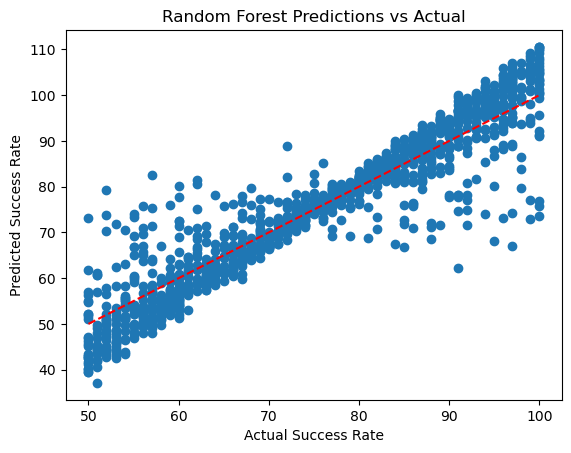

In [94]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Success Rate')
plt.ylabel('Predicted Success Rate')
plt.title('Random Forest Predictions vs Actual')
plt.show()

### Saving The Model

In [95]:
joblib.dump(best_model, 'regression.joblib')

['regression.joblib']

In [96]:
joblib.dump(best_model, 'regression.joblib')

['regression.joblib']

In [97]:
joblib.dump(one_encoder, 'one_encoder.joblib')
joblib.dump(ord_encoder, 'ord_encoder.joblib')

['ord_encoder.joblib']

### Gradio App

In [1]:
pip install gradio

  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached orjson-3.11.5-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached starlette-0.50.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached annotated_doc-0.0.4-py3-none-any.whl.metadata (6.6 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/23.0 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/23.0 MB 19.2 M

In [2]:
import gradio as gr
import joblib

In [3]:
rf_model = joblib.load('regression.joblib')
one_encoder = joblib.load('one_encoder.joblib') 
ord_encoder = joblib.load('ord_encoder.joblib')

In [4]:
country_choices = ['UK', 'China', 'France', 'Israel', 'USA', 'UAE', 'India', 'Japan', 'Russia', 'Germany']
mission_type_choices = ['Unmanned', 'Manned']
satellite_type_choices = ['Research', 'Weather', 'Communication', 'Navigation', 'Spy']
technology_choices = ['Traditional Rocket', 'Solar Propulsion', 'AI Navigation', 'Reusable Rocket', 'Nuclear Propulsion']
collab_country_choices = ['Germany', 'USA', 'Russia', 'Japan', 'UAE', 'Israel', 'UK', 'India', 'China', 'France']
env_choices = ['Low', 'Medium', 'High']

nominal_cols = ['Main Country','Mission Type','Satellite Type','Technology Used','Collaborating Country']
ordinal_cols = ['Environmental Impact']
numeric_cols = ['Year', 'Budget (in Billion $)', 'Duration (in Days)']


# AI GENERATE STARTS FROM HERE BEEP BOOP
def predict_mission(Main_Country, Year, Mission_Type, Satellite_Type, Budget, Technology_Used,
                    Environmental_Impact, Collaborating_Country, Duration_Days):
    
    # Create single-row DataFrame with numeric + single-valued nominal/ordinal columns
    user_df = pd.DataFrame({
        'Main Country': [Main_Country],
        'Year': [Year],
        'Mission Type': [Mission_Type],
        'Satellite Type': [Satellite_Type],
        'Budget (in Billion $)': [Budget],
        'Technology Used': [Technology_Used],
        'Environmental Impact': [Environmental_Impact],
        'Collaborating Country': [Collaborating_Country[0]],  # temporary placeholder
        'Duration (in Days)': [Duration_Days]
    })

    # Handle multiple collaborating countries by duplicating the row for each selected country
    collab_rows = []
    for country in Collaborating_Country:
        row_copy = user_df.copy()
        row_copy['Collaborating Country'] = country
        collab_rows.append(row_copy)
    
    multi_collab_df = pd.concat(collab_rows, axis=0)

    # Transform categorical columns
    nominal_encoded = one_encoder.transform(multi_collab_df[nominal_cols])
    ordinal_encoded = ord_encoder.transform(multi_collab_df[ordinal_cols])

    # Extract numeric values
    numeric = multi_collab_df[numeric_cols].values

    # Combine all features
    final_input = np.hstack([numeric, nominal_encoded, ordinal_encoded])

    # Predict and average if multiple collaborators
    predictions = rf_model.predict(final_input)
    prediction = predictions.mean()
    
    return round(prediction, 2)

# AI GENERATION ENDS HERE BEEP BOOP

inputs = [
    gr.Dropdown(label='Main Country', choices=country_choices),
    gr.Number(label='Year'),
    gr.Dropdown(label='Mission Type', choices=mission_type_choices),
    gr.Dropdown(label='Satellite Type', choices=satellite_type_choices),
    gr.Number(label='Budget (in Billion $)'),
    gr.Dropdown(label='Technology Used', choices=technology_choices),
    gr.Dropdown(label='Environmental Impact', choices=env_choices),
    gr.CheckboxGroup(label='Collaborating Country', choices=collab_country_choices),
    gr.Number(label='Duration (in Days)'),
]

outputs = gr.Number(label='Predicted Success Rate (%)')

app = gr.Interface(fn=predict_mission,inputs=inputs,outputs=outputs,title='Global Space Exploration Success Rate Prediction App')

app.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
